# PHYS 3800: Assignment 1

**Dr. James Munroe**

January 2020

*Solutions*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Assignment 1: 7.6, 7.8, 7.12, 7.14.
- Due: Friday, January 31, 2020

- - -

## **Problem 7.6.** Nature of the probability distribution

### a. Compute $P_N(x)$, the probability that the displacement of the walker from the origin is $x$ after $N$ steps. What is the difference between the histogram, that is, the number of occurrences, and the probability? Consider $N=10$ and $N=40$ and at least 1000 trials. Does the qualitative form of $P_N(x)$ change as the number of trials increases? What is the approximate width of $P_N(x)$ and the value of $P_N(x)$ at its maximum for each value of $N$?

Define a function `walker` than returns one realization of a random walk for length $N$. The function returns the final position $x$ after $N$ steps.

In [2]:
def walker(N=10):
    x = 0
    for n in range(N):
        if np.random.rand() < 0.5:
            x += 1
        else:
            x -= 1
        
    return {'x' : x}

Define a function `run_trials` that will call `walker` of $N$ steps a total number of $M$ trial times.  Return this as a pandas dataframe.

In [3]:
def run_trials(M=1000, N=10):

    rows = []
    for t in range(M):
        row = walker(N=N)
        rows.append(row)

    return pd.DataFrame(rows)

We can create a histogram of the number of occurrences of the final position. The histogram is a count of the number of trials the random walker at a particular value of  $x$. 

Note that if $N$ is even the random walker has to end on an even value of $x$ which is why we are using bins of width 2.  In plotting the histogram we can adjust the center of the bin.

In [4]:
def plot_histogram(N=10, M=1000):
    df = run_trials(N=N, M=M)
    hist, bins = np.histogram(df, bins=np.arange(-(N+1), (N+2), 2))

    plt.bar((bins[1:]+bins[:-1])/2, hist, width=1.8, 
            alpha=0.3, label=f'$N$={N}, $M$={M}')
    plt.xticks(np.arange(-N, N+1, 2))
    plt.xlim(-(N+1), N+1)
    
    return hist, bins

Notice that as we increase the number of trials, the histogram changes in size considerably.

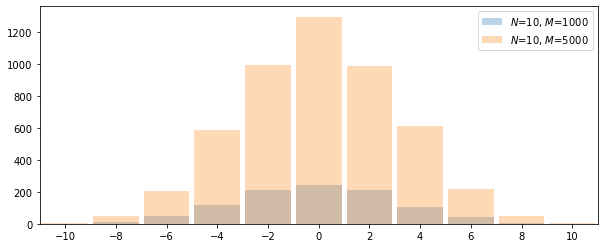

In [5]:
plt.figure(figsize=(10,4))

plot_histogram(M=1000)
plot_histogram(M=5000)
plt.legend()
plt.show()

The probability is normalized by the total number of occurrences (trials, that is, $M$). 

In [6]:
def plot_probablity(N=10, M=1000):
    df = run_trials(N=N, M=M)
    hist, bins = np.histogram(df, bins=np.arange(-(N+1), (N+2), 2))

    plt.bar((bins[1:]+bins[:-1])/2, hist/M, width=1.8, 
            alpha=0.3, label=f'$N$={N}, $M$={M}')
    plt.xticks(np.arange(-N, N+1, 2))
    plt.xlim(-(N+1), N+1)

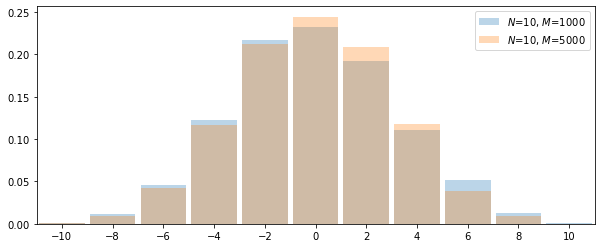

In [7]:
plt.figure(figsize=(10,4))

plot_probablity(M=1000)
plot_probablity(M=5000)
plt.legend()
plt.show()

Notice that the probability is effectively independent of $M$.

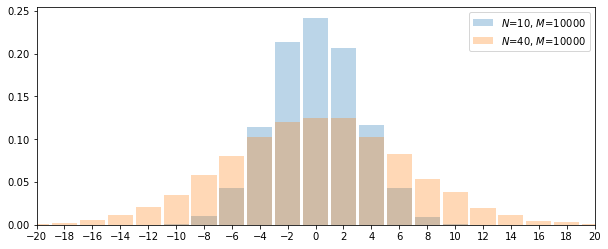

In [8]:
plt.figure(figsize=(10,4))

plot_probablity(N=10, M=10000)
plot_probablity(N=40, M=10000)
plt.xlim(-20, 20)
plt.legend()
plt.show()

- $P_{10}(x)$ has a maximum of about 0.25 with a width of about 12
- $P_{40}(x)$ has a maximum of about 0.12 with a width of about 32.


### b. What is the approximate shape of the envelope of $P_N(x)$?  Does the shape change as $N$ is increased?

$P_N(x)$ has the shape of a normal (Gaussian) distribution. Generally, it  gets wider yet shorter as $N$ increases.

### c. Fit the envelope $P_N(x)$ for sufficiently large $N$ to the continuous function

### $$C\frac{1}{\sqrt{2\pi\Delta x^2}}e^{−(x−⟨x⟩)^2/2\Delta x^2}. \quad\quad (7.10)$$

### The form of (7.10) is the standard form of the Gaussian distribution with $C= 1$. The easiest way to do this fit is to plot your results for $P_N(x)$ and the form (7.10) on the same graph using your results for $⟨x⟩$ and $\Delta x^2$ as input parameters. Visually choose the constant $C$ to obtain a reasonable fit. What are the possible values of $x$ for a given value of $N$? What is the minimum difference between these values? How does this difference compare to your value for $C$?

In [198]:
def plot_envelope(N=10, M=1000):
    
    df = run_trials(N=N, M=M)
    hist, bins = np.histogram(df, bins=np.arange(-(N+1), (N+2), 2))

    x_mean = df.x.mean()
    Δx2 = (df.x**2).mean()
    
    x = (bins[1:]+bins[:-1])/2
    plt.bar(x, hist/M, width=1.8, alpha=0.3, label=f'$N$={N}, $M$={M}')
    
    C = 2
    fit = C * 1/np.sqrt(2*np.pi*Δx2)*np.exp(-(x-x_mean)**2/(2*Δx2))
    plt.plot(x, fit, '.-')
    
    plt.xticks(np.arange(-N, N+1, 2))
    plt.xlim(-(N+1), N+1)

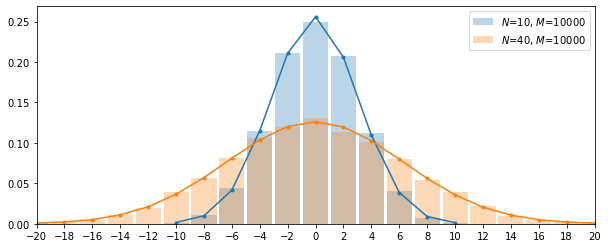

In [199]:
plt.figure(figsize=(10,4))

plot_envelope(N=10, M=10000)
plot_envelope(N=40, M=10000)
plt.xlim(-20, 20)
plt.legend()
plt.show()

The discrete probablity function $P_N(x)$ appears to match the continuous function $C\frac{1}{\sqrt{2\pi\Delta x^2}}e^{−(x−⟨x⟩)^2/2\Delta x^2}$ with a value of $C=2$.

Again, we note that if $N$ is even, then $x$ must also take on an even value ranging from $x = - N$ to $x= + N$. Since $x$ is always even, the minimum difference between any two value of $x$ is 2; this is the same as we found for the constant $C$.

- - -

## **Problem 7.8.** A random walk in two dimensions

### a. Consider a collection of walkers initially at the origin of a square lattice (see Figure 7.2). At each unit of time, each of the walkers moves at random with equal probability in one of the four possible directions. Create a drawable class, `Walker2D`, which contains the positions of $M$ walkers moving in two dimensions and draws their location, and modify `WalkerApp`. Unlike `WalkerApp`, this new class need not specify the maximum number of steps. Instead the number of walkers should be specified.

Define a function `walker2D` than returns one realization of a random walk for length $N$ in two dimensions The function returns the final position in terms of $x$ and $y$ after $N$ steps on a square lattice.

In [213]:
def walker2D(N = 100):
    x = 0
    y = 0
    for n in range(N):
        r = np.random.rand()
        if r < 0.25:
            x += 1
        elif r < 0.50:
            x -= 1
        elif r < 0.75:
            y += 1
        else:
            y -= 1
    return {'x': x, 'y': y}

Define a function `run_trials2D` that will call `walker2D` of $N$ steps a total number of $M$ trial times.  As opposed to a `for` loop, here we use a list comprehension. Return this as a pandas dataframe.

In [214]:
def run_trials2D(M=10, N=20):

    rows = [walker2D(N=N) for r in range(M)]

    return pd.DataFrame(rows)

### b. Run your application with the number of walkers $M \gt 1000$ and allow the walkers to take at least 500 steps. If each walker represents a bee, what is the qualitative nature of the shape of the swarm of bees? Describe the qualitative nature of the surface of the swarm as a function of the number of steps, $N$. Is the surface jagged or smooth?

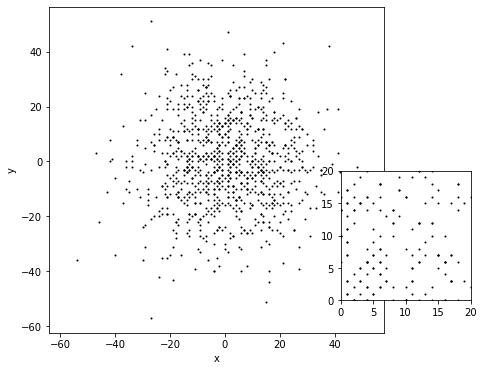

In [281]:
df = run_trials2D(N=500, M=1000)
plt.figure(figsize=(6, 6))
plt.plot(df.x, df.y, 'k.', markersize=2)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.axes([0.8, 0.2, 0.3, 0.3])
plt.plot(df.x, df.y, 'k.', markersize=2)
plt.axis([0, 20, 0, 20])
plt.show()

The distribution is centered around (0,0) forming an approximately circular boundary.  The boundary is very jagged.

The apparent horizontal and vertical lines that might be visible in the distribution are likely a visualize artifact to the aliasing of the pixels on the screen. This can be confirmed by zooming into the top right corner of the distribution where no horizontal or vertical lines are still visible.

### c. Compute the quantities $⟨x⟩$,$⟨y⟩$, $\Delta x^2$, and $\Delta y^2$ as a function of $N$. The average is over the $M$ walkers. Also compute the mean square displacement $R^2$ given by

### $$ R^2=⟨x^2⟩−⟨x⟩^2+⟨y^2⟩−⟨y⟩^2= \Delta x^2+ \Delta y^2\quad\quad(7.11)$$

### What is the dependence of each quantity on $N$? (As before, we will frequently write $R^2$ instead of $R_N^2$.)

In [330]:
def compute_stats(M=1000, Nvalues=[]):

    rows = []
    for N in Nvalues:
        df = run_trials2D(N=N, M=M)

        x_mean = df.x.mean()
        y_mean = df.y.mean()
        Δx2 = (df.x**2).mean() - x_mean**2
        Δy2 = (df.y**2).mean() - y_mean**2
        R2 = Δx2 + Δy2
        R = np.sqrt(R2)

        rows.append({'N': N, 'R': R,
                     'x_mean': x_mean, 'y_mean': y_mean,
                     'Δx2': Δx2, 'Δy2': Δy2, 'R2': R2})

    return pd.DataFrame(rows)

In [331]:
df = compute_stats(M=1000, Nvalues= range(20, 300, 20))

The values of $<x>$ and $<y>$ stay near 0 for all values of $N$.

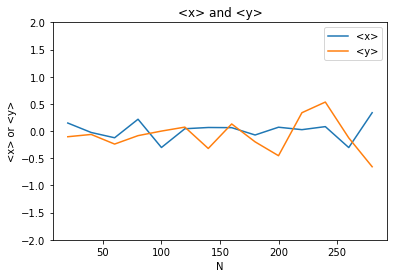

In [332]:
plt.plot(df.N, df.x_mean, label='<x>')
plt.plot(df.N, df.y_mean, label='<y>')
plt.ylabel('<x> or <y>')
plt.xlabel('N')
plt.ylim(-2, 2)
plt.title(f'<x> and <y>')
plt.legend()
plt.show()

The quantities $\Delta x^2$ and  $\Delta y^2$ (and hence $R^2$) grow linearly with $N$.

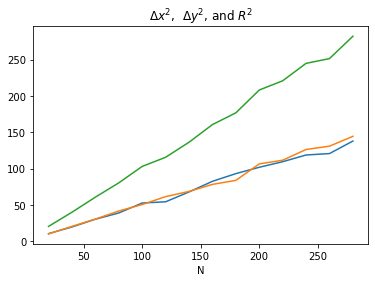

In [333]:
plt.plot(df.N, df.Δx2)
plt.plot(df.N, df.Δy2)
plt.plot(df.N, df.R2)
plt.ylabel('')
plt.xlabel('N')
plt.title(f'$\Delta x^2$,  $\Delta y^2$, and $R^2$')
plt.show()

### d. Estimate $R^2$ for $N= 8$, $16$, $32$, and $64$ by averaging over a large number of walkers for each value of $N$. Assume that $R=\sqrt{R^2}$ has the asymptotic $N$ dependence: 

### $$R∼N^\nu,\quad(N \gg 1)\quad\quad(7.12)$$

### and estimate the exponentνfrom a log-log plot of $R^2$ versus $N$. We will see in Chapter 14 that the exponent $1/\nu$ is related to how a random walk fills space. If $\nu\approx 1/2$, estimate the magnitude of the self-diffusion coefficient $D$ from the relation $R^2= 4DN$.

In [334]:
df = compute_stats(M=1000, Nvalues=[8, 16, 32, 64, 128])

0.4973515202510517

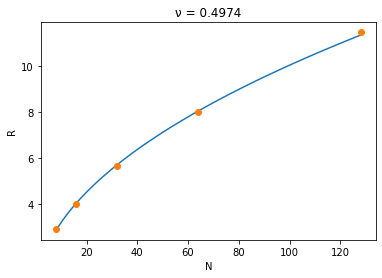

In [335]:
def estimate_ν(df):
    ν, C = np.polyfit(np.log(df.N), np.log(df.R), 1)

    N = np.linspace(df.N.min(), df.N.max(), 50)
    R_fit = N**ν*np.exp(C)

    plt.plot(N, R_fit, '-')
    plt.plot(df.N, df.R, 'o')

    plt.xlabel('N')
    plt.ylabel('R')
    plt.title(f'ν = {ν:.4f}')
    return ν

estimate_ν(df)

With $M$=10000, we find a power relationship of $R \sim N^\nu$ with $\nu = 0.4974$

Using $R^2 = 4 D N$, we can fit a straight line:

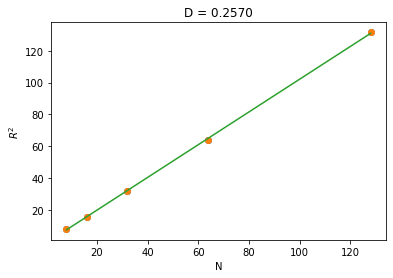

In [348]:
plt.plot(df.N, df.R2, 'o')

m, b = np.polyfit(df.N, df.R2, 1)
N = np.linspace(df.N.min(), df.N.max(), 50)
R2_fit = np.polyval([m, b], N)
D = m / 4

plt.plot(df.N, df.R2, 'o')
plt.plot(N, R2_fit, '-')
plt.xlabel('N')
plt.ylabel('$R^2$')
plt.title(f'D = {D:.4f}')
plt.show()


This gives a value of $D = 0.2570$ for the self-diffusion coefficient on a square lattice.

### e. Do a Monte Carlo simulation of $R^2$ on a triangular lattice (see Figure 8.5) and estimate $\nu$. Can you conclude that the exponent $\nu$ is independent of the symmetry of the lattice? Does $D$ depend on the symmetry of the lattice? If so, give a qualitative explanation for this dependence.

In a triangular lattice, each particle position has six nearest-neighbors so the probability of moving to any one particular neighboring position is 1 in 6.

In [397]:
def walker2D_triangular(N=100):
    
    xAccum = np.zeros(N+1)
    yAccum = np.zeros(N+1)
    
    x = 0
    y = 0
    for n in range(N):

        r = np.random.rand()
        if r < 1/6:
            x += 1
        elif r < 2/6:
            x += 0.5
            y += np.sqrt(3)/2
        elif r < 3/6:
            x -= 0.5
            y += np.sqrt(3)/2
        elif r < 4/6:
            x -= 1
        elif r < 5/6:
            x -= 0.5
            y -= np.sqrt(3)/2
        else:
            x += 0.5
            y -= np.sqrt(3)/2
            
        xAccum[n+1] = x
        yAccum[n+1] = y
    return {'x': x, 'y': y, 
            'xAccum': xAccum, 'yAccum': yAccum}

In [418]:
def run_trials2D_triangular(M=10, N=10):

    rows = [walker2D_triangular(N=N) for r in range(M)]
    return pd.DataFrame(rows)

In [419]:
def plot_xy(df):
    for walk in df.itertuples():
        plt.plot(walk.xAccum, walk.yAccum,'k-', linewidth=0.1)

    plt.xlabel('x')
    plt.ylabel('y')


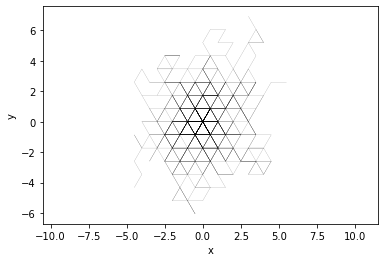

In [420]:
df = run_trials2D_triangular(M=100, N=10)
plot_xy(df)
plt.axis('equal')
plt.show()

In [421]:
def compute_stats_triangular(M=1000, Nvalues=[]):

    rows = []
    for N in Nvalues:
        df = run_trials2D_triangular(N=N, M=M)

        x_mean = df.x.mean()
        y_mean = df.y.mean()
        Δx2 = (df.x**2).mean() - x_mean**2
        Δy2 = (df.y**2).mean() - y_mean**2
        R2 = Δx2 + Δy2
        R = np.sqrt(R2)

        rows.append({'N': N, 'R': R,
                     'x_mean': x_mean, 'y_mean': y_mean,
                     'Δx2': Δx2, 'Δy2': Δy2, 'R2': R2})

    return pd.DataFrame(rows)

In [422]:
df = compute_stats_triangular(M=1000, 
                              Nvalues=[8, 16, 32, 64, 128])

In [423]:
df

,N,R,x_mean,y_mean,Δx2,Δy2,R2
0,8,2.788074,-0.0690,0.053694,3.772739,4.000617,7.773356
1,16,3.939073,0.1480,0.088335,7.844096,7.672197,15.516293
2,32,5.629226,0.1435,0.161947,15.891658,15.796523,31.688181
3,64,8.075030,0.3175,-0.118645,33.608444,31.597673,65.206117
4,128,11.227737,0.3500,0.349874,61.491000,64.571088,126.062088


0.5055064757106084

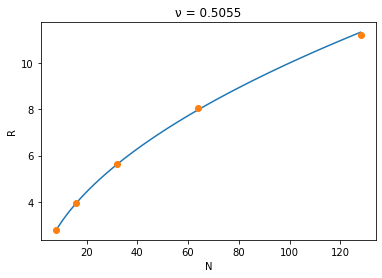

In [424]:
estimate_ν(df)

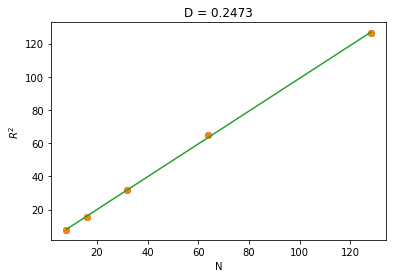

In [425]:
plt.plot(df.N, df.R2, 'o')

m, b = np.polyfit(df.N, df.R2, 1)
N = np.linspace(df.N.min(), df.N.max(), 50)
R2_fit = np.polyval([m, b], N)
D = m / 4

plt.plot(df.N, df.R2, 'o')
plt.plot(N, R2_fit, '-')
plt.xlabel('N')
plt.ylabel('$R^2$')
plt.title(f'D = {D:.4f}')
plt.show()


Even with a triangular lattice, we recover the same self-diffusion coefficient of $D\approx 0.25$ showing that $D$ does not depend on the lattice symmetry.

### f. Enumerate all the random walks on a square lattice for $N= 4$ and obtain exact results for $⟨x⟩$, $⟨y⟩$, and $R^2$. Assume that all four directions are equally probable. Verify your program by comparing the Monte Carlo and exact enumeration results

One way to enumerate all possible random walks up to $N=4$ is to have four nested loops so that each possibility is counted.

In [431]:
directions = [(1,0), (0,1), (-1,0), (0,-1)]

In [441]:
rows = []
for dx1, dy1 in directions:
    for dx2, dy2 in directions:
        for dx3, dy3 in directions:
            for dx4, dy4 in directions:
                x = dx1 + dx2 + dx3 + dx4
                y = dy1 + dy2 + dy3 + dy4
                rows.append({'x': x, 'y': y})
df_exact = pd.DataFrame(rows)

In [445]:
def compute_stats(df):
    x_mean = df.x.mean()
    y_mean = df.y.mean()
    Δx2 = (df.x**2).mean() - x_mean**2
    Δy2 = (df.y**2).mean() - y_mean**2
    R2 = Δx2 + Δy2
    
    return pd.DataFrame([{'x_mean': x_mean, 'y_mean': y_mean,
                   'Δx2': Δx2, 'Δy2': Δy2, 'R2': R2,
                         'count': len(df)}])

Here are the *exact* values for $N=4$ steps over all 256 possible walks.

In [447]:
compute_stats(df_exact)

,x_mean,y_mean,Δx2,Δy2,R2,count
0,0.0,0.0,2.0,2.0,4.0,256


Compared simulating $M=10000$ random walks using a Monte Carlo simulation we get similar results.

In [454]:
df_random = run_trials2D(N=4, M=10000)
compute_stats(df_random)

,x_mean,y_mean,Δx2,Δy2,R2,count
0,0.0034,0.009,2.056388,1.972719,4.029107,10000


- - -

## **Problem 7.12.** Synchronized random walks

### a. Randomly place two walkers on a one-dimensional lattice of $L$ sites, so that both walkers are not at the same site. At each time step randomly choose whether the walkers move to the left or to the right. Both walkers move in the same direction. If a walker cannot move in the chosen direction because it is at a boundary, then this walker remains at the same site for this timestep. A trial ends when both walkers are at the same site. Write a program to determine the mean time and the mean square fluctuations of the time for two walkers to reach the same site. This model is relevant to a method of doing cryptography using neural networks (see Rutter et al.).

In [286]:
def synchro_walkers_history(L = 100, p=0.5):

    # choose a random position for the first walker
    x1 = np.random.randint(L)
    # choose a random position for the second walker
    x2 = np.random.randint(L)
    while x1==x2:
        # if the walkers are starting on the same location, 
        # choose a new starting position
        x2 = np.random.randint(L)

    n = 0
    while x1 != x2:
        yield {'n': n, 'x1': x1, 'x2': x2}
        
        if np.random.rand() < p:
            # move right
            if x1 < (L-1):
                x1 += 1
            if x2 < (L-1):
                x2 += 1
        else:
            # move left
            if x1 > 0:
                x1 -= 1
            if x2 > 0:
                x2 -= 1

        # increment time step
        n += 1
        
    yield {'n': n, 'x1': x1, 'x2': x2}

Examples of pairs of synchronized walkers:

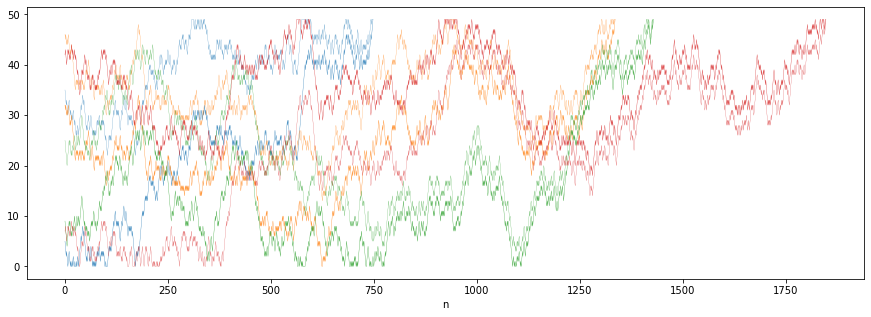

In [312]:
fig, ax = plt.subplots(figsize=(15,5))

for i in range(4):
    df = pd.DataFrame(synchro_walkers_history(L=50, p=0.5))
    
    line, = ax.plot(df.n, df.x1, linestyle = '-', linewidth=0.3)
    ax.plot(df.n, df.x2, color = line.get_color(), linewidth=0.2)
    
plt.xlabel('n')
plt.show()

We interested in how many steps it takes to reach the same point. It is not necessary to store the complete history of each walkers path.

In [313]:
def synchro_walkers(L = 100, p=0.5):

    # choose a random position for the first walker
    x1 = np.random.randint(L)
    # choose a random position for the second walker
    x2 = np.random.randint(L)
    while x1==x2:
        # if the walkers are starting on the same location, 
        # choose a new starting position
        x2 = np.random.randint(L)

    n = 0
    while x1 != x2:
        
        if np.random.rand() < p:
            # move right
            if x1 < (L-1):
                x1 += 1
            if x2 < (L-1):
                x2 += 1
        else:
            # move left
            if x1 > 0:
                x1 -= 1
            if x2 > 0:
                x2 -= 1

        # increment time step
        n += 1
    
    return n

We want to run many trials of synchronized walks and measure the mean number steps, and the mean square fluctuation of the number of times steps.

In [314]:
def many_synchro_walkers(L=10, M=100, p=0.5):

    n = np.zeros(M)
    for m in range(M):
        n[m] = synchro_walkers(L=L, p=p)
    
    n_mean = n.mean()
    Δn2 = (n**2).mean() - n_mean
    return {'L': L, 'M': M, 'n_mean': n_mean, 'Δn2': Δn2}

In [315]:
row = many_synchro_walkers(L=20, M=2000)
row

{'L': 20, 'M': 2000, 'n_mean': 128.167, 'Δn2': 28408.436999999998}

We can now run this program for several different values of $L$

In [377]:
def collect_results(M=2000, p=0.5):
    rows = []
    M = 2000
    for L in [4, 8, 16, 32, 64]:
        row = many_synchro_walkers(L=L, M=M, p=p)
        rows.append(row)
    df = pd.DataFrame(rows)
    
    return df

df1 = collect_results()

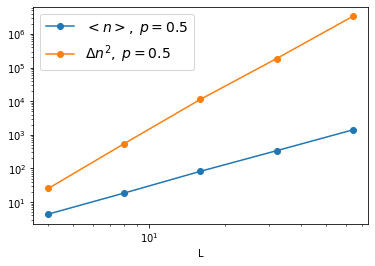

In [390]:
def plot_results(df, p=0.5):

    plt.loglog(df.L, df.n_mean, 'o-', label=f'$<n>,\;p={p}$')
    plt.loglog(df.L, df.Δn2, 'o-', label=f'$Δn^2,\;p={p}$')
    
    plt.xlabel('L')
    plt.legend(fontsize=14)


plot_results(df1)

We see that both $<n>$ and $\Delta n^2$ are power laws of $L$ of the form

$$ \begin{align}
<n> &= L^\alpha \\
\Delta n^2 &= L^\beta
\end{align}$$

In [391]:
α, _  = np.polyfit(np.log(df1.L), np.log(df1.n_mean), deg=1)
β, _ = np.polyfit(np.log(df1.L), np.log(df1.Δn2), deg=1)

with

In [392]:
print(f'α = {α:.1f} and β = {β:.1f}')

α = 2.1 and β = 4.2


### b. Change your program so that you use biased random walkers for which $p\neq q$. How does this change affect your results?

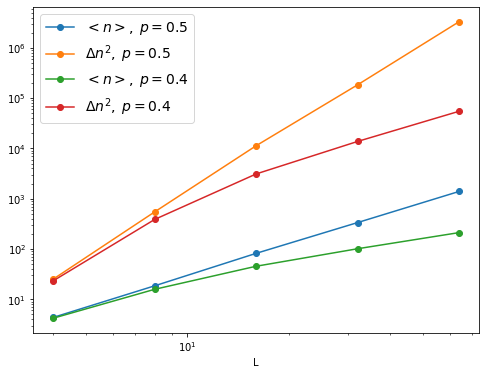

In [395]:
df2 = collect_results(p=0.40)
plt.figure(figsize=(8,6))
plot_results(df1, p=0.5)
plot_results(df2, p=0.4)

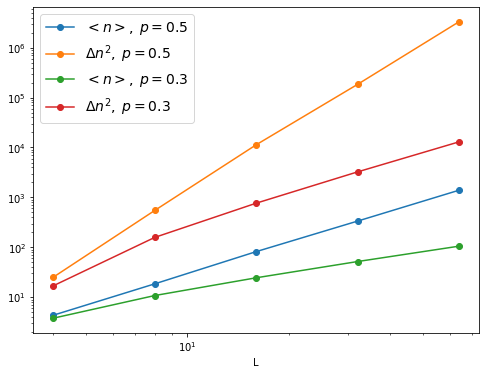

In [397]:
df2 = collect_results(p=0.30)
plt.figure(figsize=(8,6))
plot_results(df1, p=0.5)
plot_results(df2, p=0.3)

When $p \neq q$ we can see that the number of steps and the size of the mean square fluctuation is reduced. Also, there no longer a power law dependence on $L$.

- - -

## **Problem 7.14.** Random walks with steps of variable length 

### a. Consider a random walk in one dimension with jumps of all lengths.  The probability that the length of a single step is between $a$ and $a+ \Delta a$ is $f(a)\Delta a$, where $f(a)$ is the probability density. If the form of $f(a)$ is given by $f(a) =C e^
{−a}$ for $a >0$ with the normalization condition $\int_0^\infty f(a)da= 1$, the code needed to generate step lengths according to this probability density is given by (see Section 12.5)

### `stepLength = -Math.log (1 - Math.random ());`

### Modify `Walker` and `WalkerApp` to simulate walks of variable length with this probability density. Consider $N\ge 100$ and visualize the motion of the walker. Generate many walks of $N$ steps and determine $p(x)\Delta x$, the probability that the displacement is between $x$ and $x+ \Delta x$ after $N$ steps. Plot $p(x)$ versus $x$ and confirm that the form of $p(x)$ is consistent with a Gaussian distribution. Note that the bin width $\Delta x$ is one of the input parameters. 

In [415]:
def walker_varlength(N=100):
    x = 0
    for n in range(N):
        stepLength = - np.log( 1 - np.random.rand() )
        
        x += stepLength
        yield {'n': n, 'x': x}

Here are some typically random walks with a variable step length:

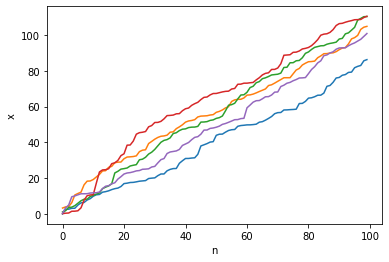

In [426]:
N = 100
for m in range(5):
    df = pd.DataFrame(walker_varlength(N=N))
    plt.plot(df.n, df.x)

plt.xlabel('n')
plt.ylabel('x')
plt.show()

We only need to keep the final position for each random walker.

In [431]:
def run_trials_varlength(M=1000, N=200):

    rows = []
    for m in range(M):
        
        x = 0
        for n in range(N):
            stepLength = - np.log( 1 - np.random.rand() )
            x += stepLength
        rows.append({'x': x})

    return pd.DataFrame(rows)

In [539]:
df = run_trials_varlength(M=10000, N=200)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126f3b550>]],
      dtype=object)

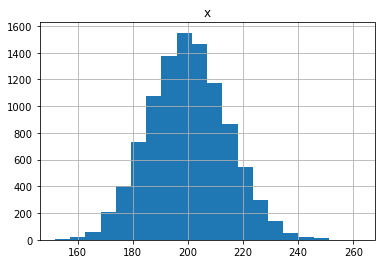

In [540]:
df.hist(bins=20)

For $N$=200, the distribution looks Gaussian with a mean at 200.

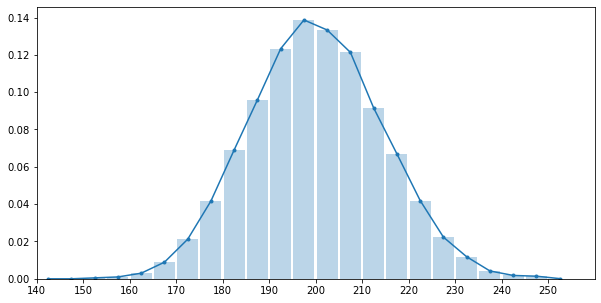

In [541]:
plt.figure(figsize=(10,5))
N=200
ΔN=60
M=len(df)
hist, bins = np.histogram(df, bins=np.arange(N-ΔN, N+ΔN, 5))

plt.bar((bins[1:]+bins[:-1])/2, hist/M, width=4.5, alpha=0.3)
plt.plot((bins[1:]+bins[:-1])/2, hist/M, '.-')

plt.xticks(np.arange(N-ΔN, N+ΔN, 10))
plt.xlim(N-ΔN, N+ΔN)
plt.show()

Yes. The probability density definitely looks like a Gaussian.

### b. Assume that the probability density $f(a)$ is given by $f(a) =C/a^2$ for $a \ge 1$. Determine the normalization constant $C$ using the condition $C \int_1^\infty a^{-2} da= 1$. In this case, we will learn in Section 12.5 that the statement

### `stepLength = 1.0/(1.0-Math.random());`

### generates values of $a$ according to this form of $f(a)$. Do a Monte Carlo simulation as in part (a) and determine $p(x)\Delta x$. Is the form of $p(x)$ a Gaussian? This type of random walk for which $f(a)$ decreases as a power law, $a^{-1-\alpha}$, is known as a *Levy flight* for $\alpha \le 2$.

To normalize $C \int_0^\infty a^{-2} da= 1$ we need to evaluate the integral symbolically. While this can be done by hand straightforwardly, remember that tools like SymPy are also available.

In [583]:
import sympy as sp

In [592]:
a = sp.symbols('a')
I = sp.Integral(a**(-2), (a, 1, sp.oo) )
display(I)

Integral(a**(-2), (a, 1, oo))

In [593]:
I.doit()

1

So we find the normalization constant is $C=1$.

We can simulate random walks with the given step length.

In [542]:
def run_trials_varlength_2b(M=1000, N=200):

    rows = []
    for m in range(M):
        
        x = 0
        for n in range(N):
            stepLength = 1.0 / (1.0 - np.random.rand())
            x += stepLength
        rows.append({'x': x})

    return pd.DataFrame(rows)

In [543]:
df = run_trials_varlength_2b(M=10000, N=200)

Let's again construct a probablity distribution.

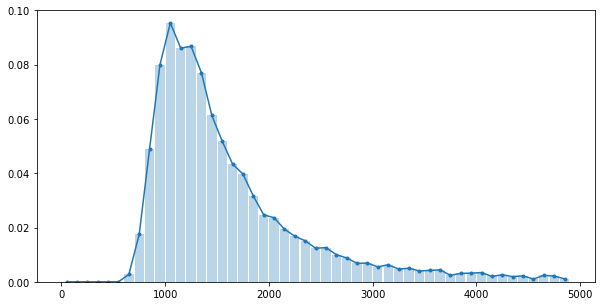

In [545]:
hist, bins = np.histogram(df, bins=np.arange(50)*100)
plt.figure(figsize=(10,5))

plt.bar((bins[1:]+bins[:-1])/2, hist/M, width=90, alpha=0.3)
plt.plot((bins[1:]+bins[:-1])/2, hist/M, '.-')
plt.show()

This is not a Gaussian distribution. For $N=200$ steps the most likely length is around 1200 it it is possible for an individual random walk to be very, very long!